In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import h5py
import librosa as lb


In [2]:
PATH = "generi_test.h5"

In [3]:
class Data():
    def __init__(self, mfcc, generi, target) -> None:
        self.mfcc = mfcc
        self.generi = generi
        self.target = target

data: Data = None
with h5py.File(PATH, "r") as d:
    print(d.keys(), d.attrs.keys())
    mfcc = d["mfccs"][::].copy()
    generi = d.attrs["generi"][::].copy()
    target = d.attrs["target"][::].copy()
    data = Data(mfcc=mfcc, generi=generi, target=target)



<KeysViewHDF5 ['mfccs']> <KeysViewHDF5 ['generi', 'target']>


In [4]:
x_train, x_test, y_train, y_test = train_test_split(data.mfcc, data.target, test_size=0.20)

In [5]:
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(data.mfcc.shape[1], data.mfcc.shape[2])),
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dropout(0.21),
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dropout(0.21),
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dropout(0.21),
    keras.layers.Dense(10, activation="softmax")
])

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-04-16 16:49:24.748735: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2025-04-16 16:49:24.748778: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-04-16 16:49:24.748783: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
I0000 00:00:1744814964.748821 7500464 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1744814964.748861 7500464 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physic

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3367)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,724,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,872,842 (7.14 MB)

 Trainable params: 1,872,842 (7.14 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3367)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,724,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,872,842 (7.14 MB)

 Trainable params: 1,872,842 (7.14 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
netfit = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=32)

Epoch 1/1000


2025-04-16 16:49:33.503573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 0.1023 - loss: 213.4478 - val_accuracy: 0.1500 - val_loss: 118.0363
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0703 - loss: 210.7243 - val_accuracy: 0.1000 - val_loss: 119.2116
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1727 - loss: 199.5634 - val_accuracy: 0.1500 - val_loss: 119.4671
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1391 - loss: 180.9285 - val_accuracy: 0.2000 - val_loss: 103.6874
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1633 - loss: 190.7213 - val_accuracy: 0.3500 - val_loss: 90.9897
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2836 - loss: 128.6449 - val_accuracy: 0.3500 - val_loss: 97.3089
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2664 - loss: 164.8595 - val_accuracy: 0.3000 - val_loss: 109.4694
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2422 - loss: 181.6094 - val_accu

In [9]:
import matplotlib.pyplot as plt

def show_net(net_story):
    fig, ax = plt.subplots(2)

    ax[0].plot(net_story.history["accuracy"], label="train accuracy")
    ax[0].plot(net_story.history["val_accuracy"], label="test accuracy")
    ax[0].set_ylabel("ACCURACY")
    ax[0].legend()

    ax[1].plot(net_story.history["loss"], label="train error")
    ax[1].plot(net_story.history["val_loss"], label="test error")
    ax[1].set_ylabel("ERROR")
    ax[1].legend()

    plt.show()

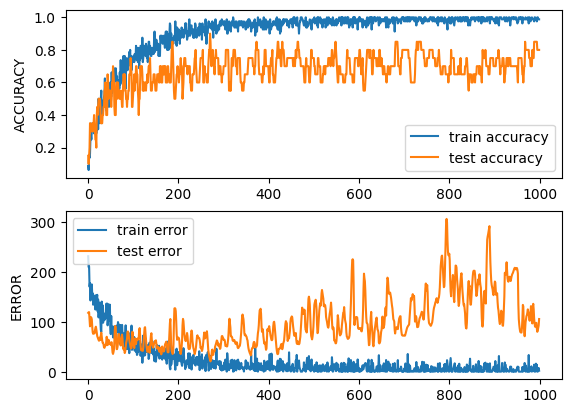

In [10]:
show_net(model.history)

In [15]:
predictions = model.predict(x=x_test)
predictions = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [16]:
predictions

array([0, 9, 5, 2, 7, 1, 7, 0, 9, 2, 9, 8, 3, 5, 3, 7, 4, 8, 5, 0])

In [17]:
y_test

array([0, 9, 5, 2, 7, 1, 7, 2, 9, 2, 3, 8, 4, 5, 3, 7, 4, 2, 5, 0])

In [18]:
generi

array(['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock',
       'hiphop', 'country', 'jazz'], dtype=object)

In [19]:
generi[predictions]

array(['pop', 'jazz', 'classical', 'disco', 'hiphop', 'metal', 'hiphop',
       'pop', 'jazz', 'disco', 'jazz', 'country', 'blues', 'classical',
       'blues', 'hiphop', 'reggae', 'country', 'classical', 'pop'],
      dtype=object)

In [20]:
generi[y_test]

array(['pop', 'jazz', 'classical', 'disco', 'hiphop', 'metal', 'hiphop',
       'disco', 'jazz', 'disco', 'blues', 'country', 'reggae',
       'classical', 'blues', 'hiphop', 'reggae', 'disco', 'classical',
       'pop'], dtype=object)

In [25]:
right = 0
for p, y in zip(predictions, y_test):
    right += int(p == y)
wrong = len(predictions) - right

In [26]:
right, wrong

(16, 4)

In [27]:
percent = right * 100 / len(predictions)
percent

80.0

In [29]:
model.save("test_model.keras")

In [30]:
rebuild_model = keras.models.load_model("test_model.keras")

In [31]:
rebuild_predictions = rebuild_model.predict(x=x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [32]:
r_predictions = np.argmax(rebuild_predictions, axis=1)
r_predictions

array([0, 9, 5, 2, 7, 1, 7, 0, 9, 2, 9, 8, 3, 5, 3, 7, 4, 8, 5, 0])

In [34]:
def create_chunk(path: str, resample_rate: float, nsamples: float) -> np.ndarray[np.float64]:
    audio, _ = lb.load(path, sr=resample_rate, mono=True)
    if len(audio) >= nsamples:
        audio = audio[:nsamples]
    else:
        pad_lenght = len(audio) - nsamples
        audio = np.pad(audio, (0, pad_lenght), mode="constant")
    
    return lb.feature.mfcc(y=audio, n_mfcc=13, hop_length=512, n_fft=2048, sr=resample_rate)
    

In [35]:
chunk = create_chunk(path="/Users/pm/AcaHub/AudioSamples/suzanne.wav", resample_rate=22050, nsamples=int(30 * 22050 / 5))

In [ ]:
p = rebuild_model.predict(x=[chunk])
p = np.argmax(p)
generi[p]

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None